Constant is 0.007471956812089626.
reading input to input_raw_df
      Time  Target  Cohort  Rhyme  Unrelated  Cross
996    996     0.0     0.0    0.0        0.0    1.0
997    997     0.0     0.0    0.0        0.0    1.0
998    998     0.0     0.0    0.0        0.0    1.0
999    999     0.0     0.0    0.0        0.0    1.0
1000  1000     0.0     0.0    0.0        0.0    1.0
   Time  Target  Cohort  Rhyme  Unrelated  Cross
0     0     0.0     0.0    0.0        0.0    1.0
1     1     0.0     0.0    0.0        0.0    1.0
2     2     0.0     0.0    0.0        0.0    1.0
3     3     0.0     0.0    0.0        0.0    1.0
4     4     0.0     0.0    0.0        0.0    1.0
reading input to input_df with LCR
Starting simulations for 12 subjects.


Simulating 100 trials for subject 0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 1:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 2:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 3:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 4:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 5:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 6:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 7:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 8:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 9:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 10:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 11:   0%|          | 0/100 [00:00<?, ?it/s]

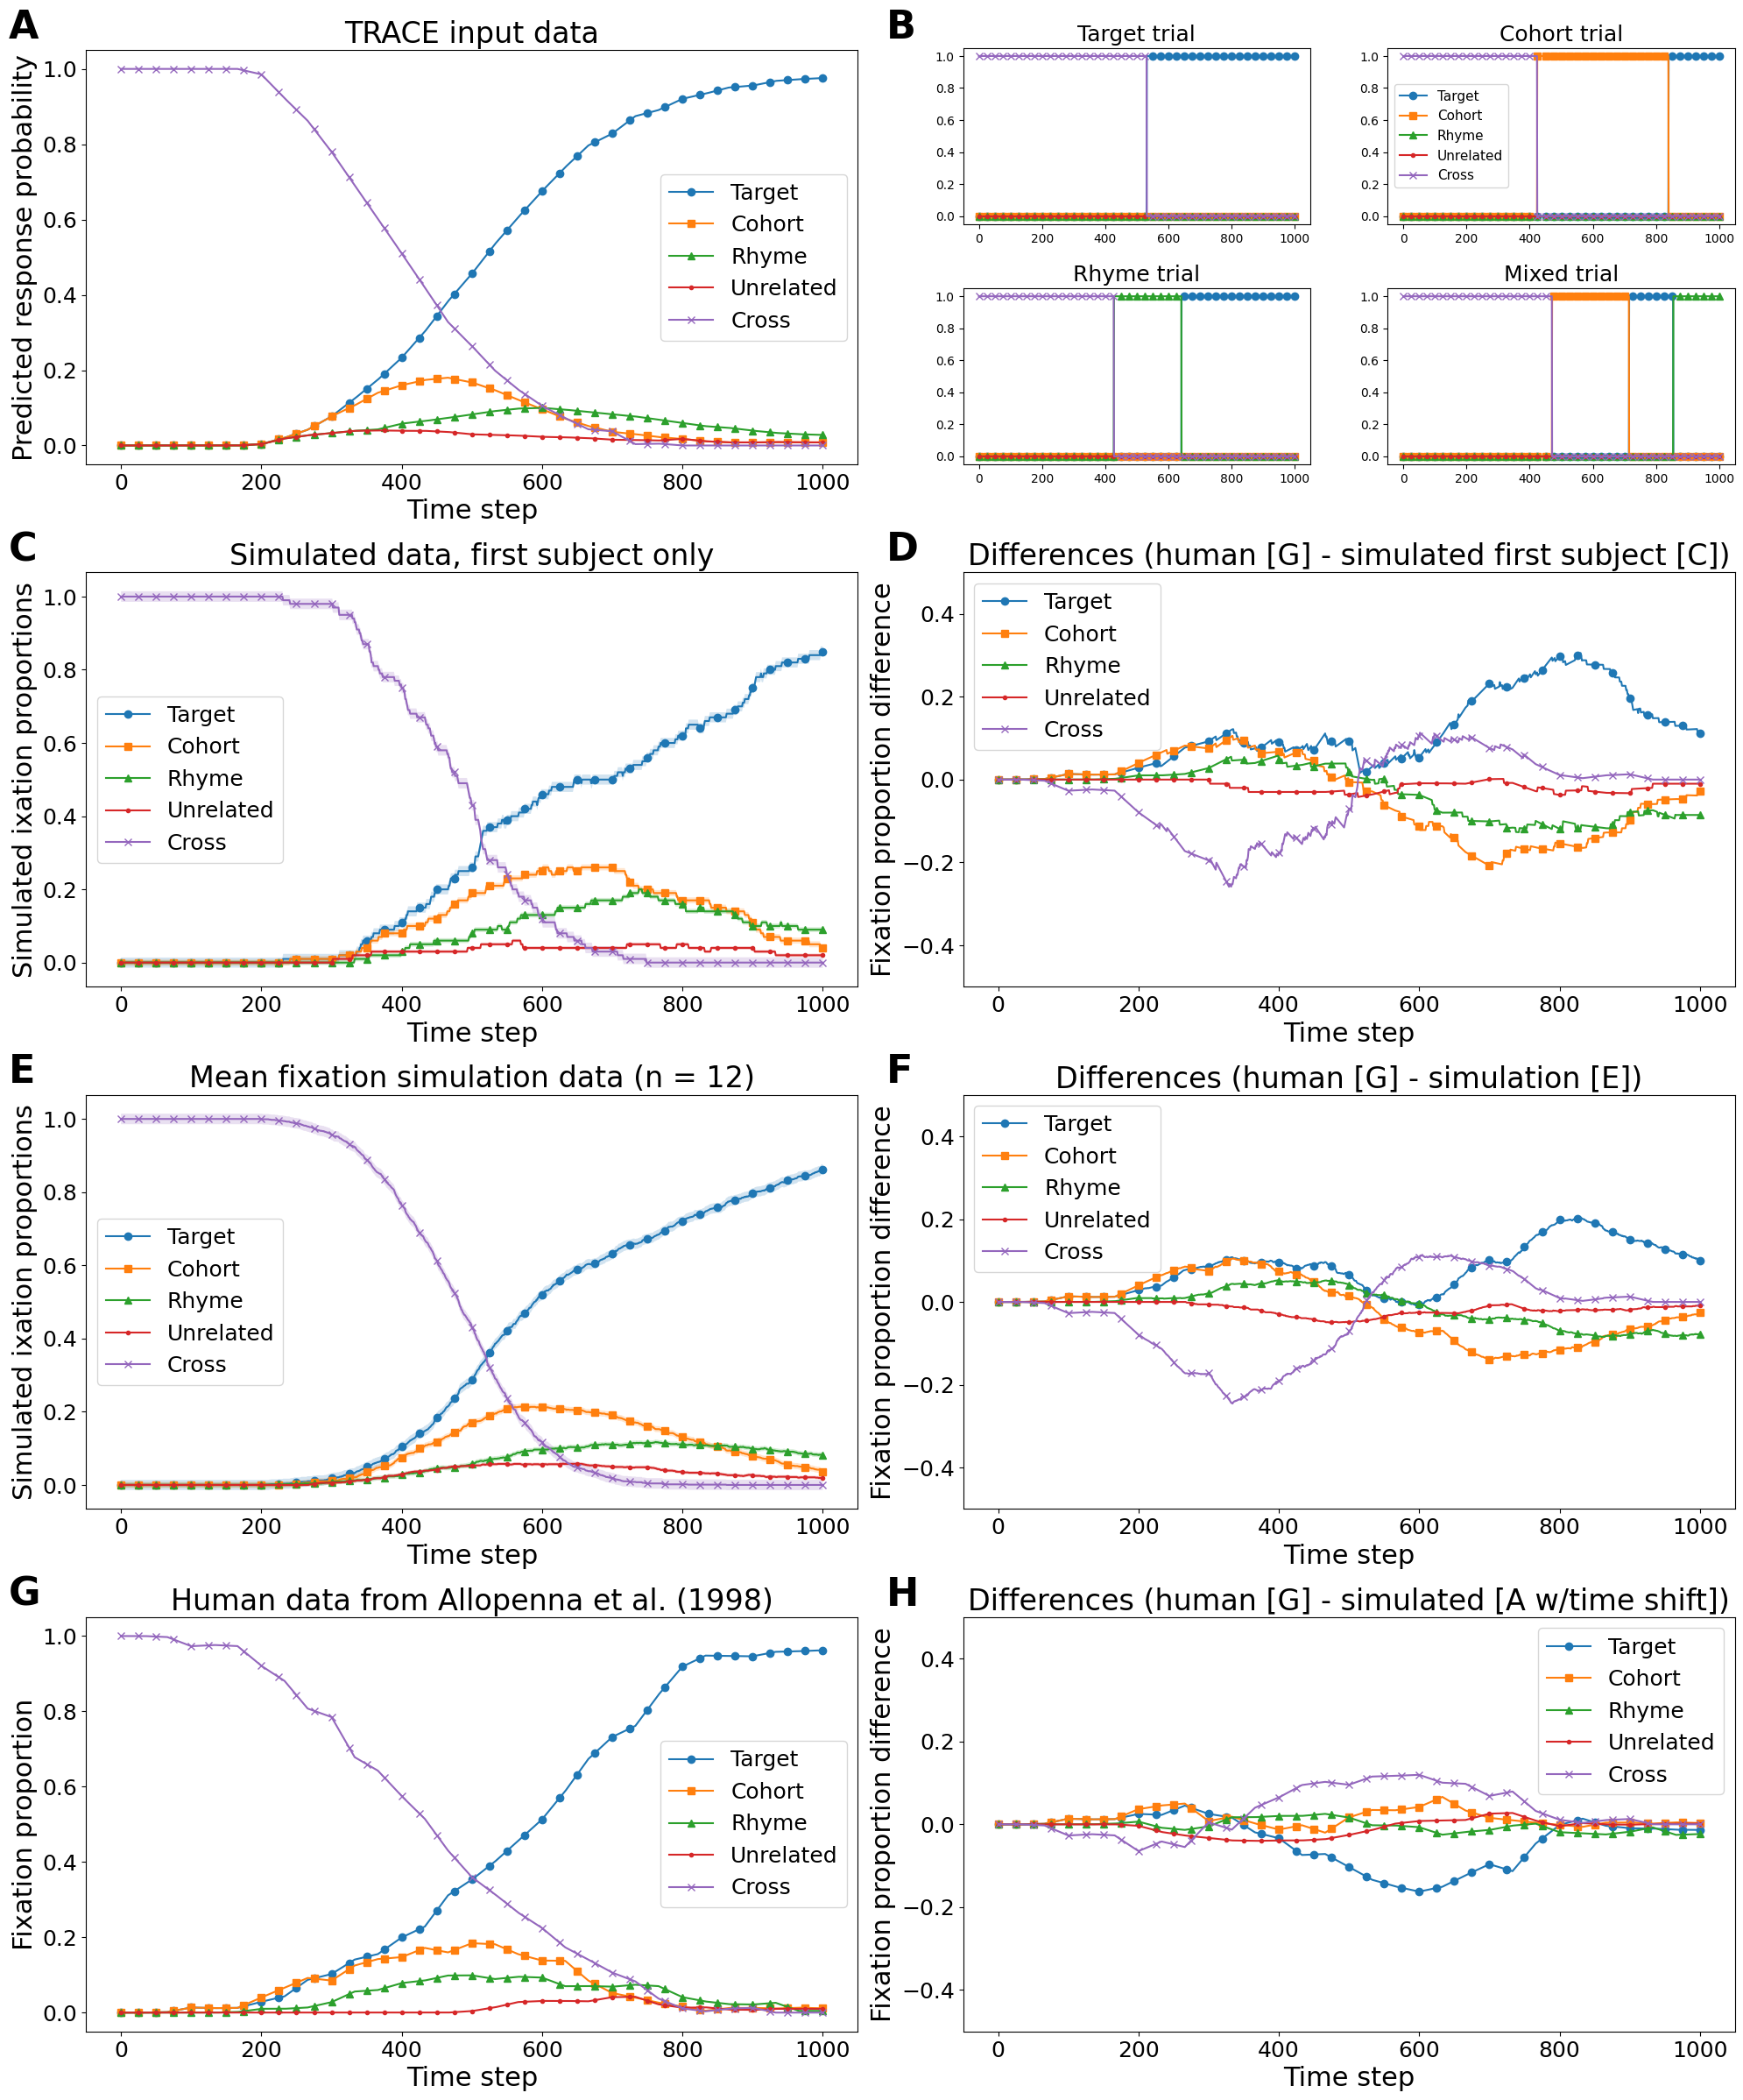

Saved figure to PNG/fig07_sim1a_fixpred_h400_p2_rs016.png
Completed iteration with rseed 16.
Constant is 0.007471956812089626.
reading input to input_raw_df
      Time    Target    Cohort     Rhyme  Unrelated     Cross
996    996  0.067203  0.067203  0.031153   0.031153  0.803286
997    997  0.067300  0.067300  0.031169   0.031169  0.803062
998    998  0.067396  0.067396  0.031185   0.031185  0.802838
999    999  0.067493  0.067493  0.031201   0.031201  0.802613
1000  1000  0.067589  0.067589  0.031217   0.031217  0.802389
   Time    Target    Cohort     Rhyme  Unrelated     Cross
0     0  0.003632  0.003632  0.003632   0.003632  0.985474
1     1  0.003677  0.003677  0.003672   0.003672  0.985301
2     2  0.003723  0.003723  0.003713   0.003713  0.985129
3     3  0.003769  0.003769  0.003753   0.003753  0.984956
4     4  0.003814  0.003814  0.003794   0.003794  0.984784
reading input to input_df with LCR
Starting simulations for 12 subjects.


Simulating 100 trials for subject 0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 1:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 2:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 3:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 4:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 5:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 6:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 7:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 8:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 9:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 10:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating 100 trials for subject 11:   0%|          | 0/100 [00:00<?, ?it/s]

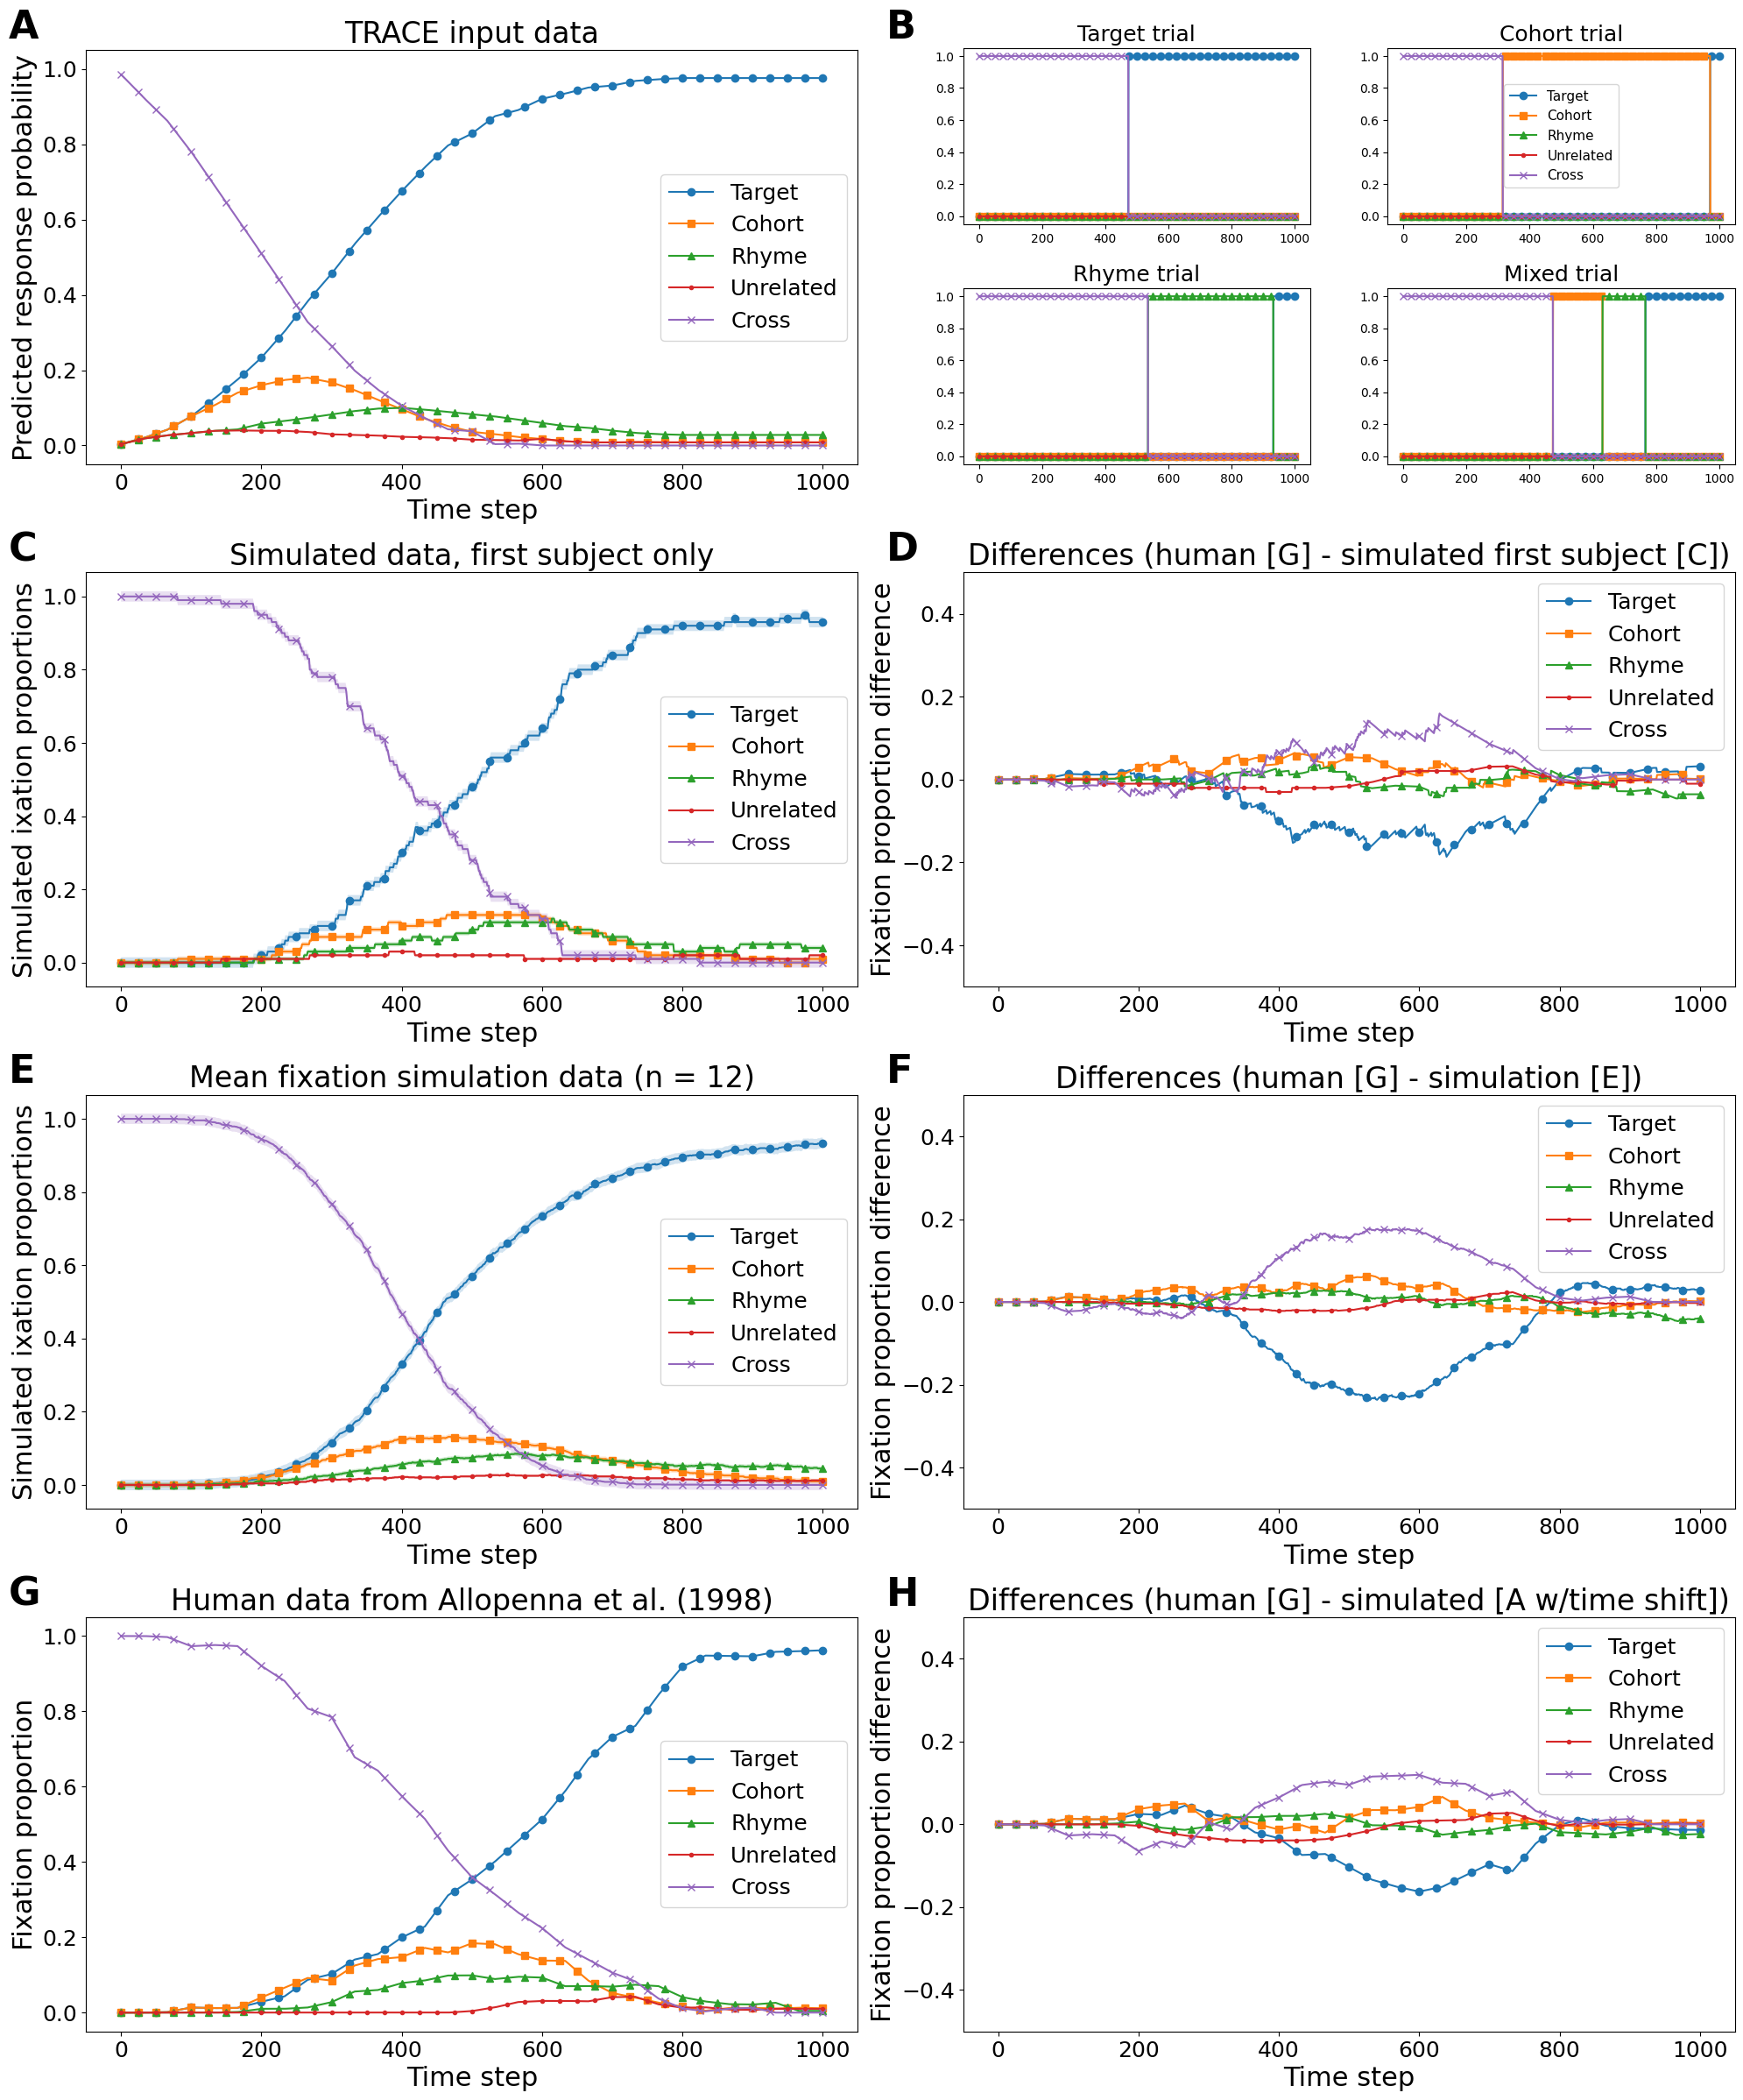

Saved figure to PNG/fig08_sim1b_fixpred_h400_p2_rs017.png
Completed iteration with rseed 17. 


In [3]:
# Import necessary libraries
import pandas as pd   # Pandas for data manipulation and analysis
import numpy as np    # Numpy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
import random  # Random for generating random numbers
from tqdm.notebook import tqdm  # TQDM for creating progress bars in Jupyter notebooks
from scipy.optimize import minimize

# Define a function to compute Luce Choice Rule (LCR) for given probabilities
def lcr(df, k=4):
    probabilities = df.iloc[:, 1:].values  # Exclude the 'Time' column for calculations
    zero_mask = probabilities.sum(axis=1) == 0  # Identify rows where all probabilities are zero
    
    response_strengths = np.exp(probabilities * k) - 1 # Compute response strengths based on probabilities
    response_strengths[zero_mask, :] = 0  # Keep rows where the sum is zero as zeros
    
    row_sums = response_strengths.sum(axis=1)  # Calculate the sum of response strengths for each row
    row_sums = np.where(row_sums == 0, 1, row_sums)  # Avoid division by zero by setting row_sums to 1 where they are 0
    
    # Reshape row_sums to match the dimensions of response_strengths
    row_sums = row_sums[:, np.newaxis]

    L = response_strengths / row_sums  # Normalize the response strengths to get L values
    transformed_df = df.copy()  # Create a copy of the original DataFrame
    transformed_df.iloc[:, 1:] = L  # Replace original probabilities with transformed ones (except the 'Time' column)
    
    return transformed_df  # Return the transformed DataFrame

def lcr09(df, k=4):
    probabilities = df.iloc[:, 1:].values  # Exclude the 'Time' column for calculations
    response_strengths = np.exp(probabilities * k) #- 1  # Compute response strengths based on probabilities
    row_sums = response_strengths.sum(axis=1)  # Calculate the sum of response strengths for each row

    # Reshape row_sums to match the dimensions of response_strengths
    row_sums = row_sums[:, np.newaxis]

    L = response_strengths / row_sums  # Normalize the response strengths to get L values
    transformed_df = df.copy()  # Create a copy of the original DataFrame
    transformed_df.iloc[:, 1:] = L  # Replace original probabilities with transformed ones (except the 'Time' column)
    
    return transformed_df  # Return the transformed DataFrame

# Define a function to interpolate missing time steps in a DataFrame
def interpolate_missing_time_steps(df):
    time_column = df.columns[0]  # Extract the time column name
    probability_columns = df.columns[1:]  # Extract the names of the probability columns
    df[time_column] = df[time_column].astype(int)  # Convert time values to integers
    full_time_range = range(df[time_column].min(), df[time_column].max() + 1)  # Generate the full range of time steps
    df_reindexed = df.set_index(time_column).reindex(full_time_range).reset_index()  # Reindex the DataFrame to fill missing time steps
    df_reindexed[probability_columns] = df_reindexed[probability_columns].interpolate()  # Interpolate missing probability values
    return df_reindexed  # Return the reindexed DataFrame

# Define a standard softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Define a function to read a CSV file, preprocess data, and apply optional transformations
def read_csv(file_path, shift=False, apply_softmax=False, tmult=1, C=5, k=1, 
             generate_cross=True, apply_lcr_first=False, apply_lcr=False, normalize=False, rescale=False, bgate=False, bthresh=0.01, tmax=1000, sum_weight=1):
    df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
    probability_columns = df.columns[1:]  # Extract the names of the probability columns

    if bgate:  # Apply bgate logic if bgate is True
        # print(f'Applying bgate with threshold {threshold}')
        row_sums = df[probability_columns].sum(axis=1)  # Sum probabilities across columns for each row
        mask = row_sums < bthresh  # Identify rows where the sum of probabilities is below the threshold
        df.loc[mask, probability_columns] = 0  # Set probabilities to 0 for those rows
    
    if rescale:  # Apply rescaling if rescale is True
        print('Rescaling data')
        df_min = df[probability_columns].min().min()  # Find the minimum value across all columns
        df_max = df[probability_columns].max().max()  # Find the maximum value across all columns
        df[probability_columns] = (df[probability_columns] - df_min) / (df_max - df_min)  # Rescale to [0, 1]

    if apply_lcr_first:  # Apply Luce choice rule if apply_lcr is True
        print(f'Applying lcr FIRST, k = {k}')
        print('BEFORE')
        print(df.tail(5))
        df = lcr(df, k=k)  # Apply LCR to the DataFrame, including only columns in the input
        print(f'AFTER')
        print(df.tail(5))
        print(df.head(5))
        
    if 'Cross' not in df.columns:  # If the 'Cross' column is missing
        sum_columns = ['Target', 'Cohort', 'Rhyme', 'Unrelated']  # Define columns for summation
        sum_columns = [col for col in sum_columns if col in df.columns]  # Filter out columns that are not in the DataFrame
        
        if generate_cross:  # If generate_cross is true
            total_sum = df[sum_columns].sum(axis=1)  # Calculate the total sum of probabilities for each row
            # max_value = df['Target'].max()  # Find the maximum value in the 'Target' column
            # max_value = total_sum.max() * sum_weight # Find the maximum value in the 'Target' column
            max_value = 1
            df['Cross'] = max_value - total_sum  # Calculate 'Cross' using the maximum value of 'Target'
            df['Cross'] = df['Cross'].clip(lower=0)  # Clip the 'Cross' values to avoid negative values
            # After generating or computing the 'Cross' column, add this code to ensure 'Cross' stays 0 after hitting zero
            cross_zero_mask = df['Cross'].eq(0)  # Identify where 'Cross' reaches zero
            df['Cross'] = df['Cross'].mask(cross_zero_mask.cumsum().gt(0), 0)  # Set 'Cross' to 0 for the rest of the timesteps
        else:  # If generate_cross is false
            df['Cross'] = np.nan  # Set the 'Cross' column to NaN values

    df['Time'] = df['Time'] * tmult  # Multiply the time column by tmult factor
    df = interpolate_missing_time_steps(df)  # Interpolate missing time steps
    # input_df = df.copy(deep=True)  # Create a deep copy of the DataFrame

    if apply_lcr:  # Apply Luce choice rule if apply_lcr is True
        print(f'Applying lcr, k={k}')
        df = lcr(df, k=k)  # Apply LCR to the DataFrame, including columns in the input AND cross if it's been added

    if normalize:  # Apply normalization if normalize is True
        row_sums = df[probability_columns].sum(axis=1)  # Get the sum for each row
        non_zero_mask = df[probability_columns] != 0  # Create a mask where the values are non-zero
        df[probability_columns] = df[probability_columns].where(~non_zero_mask, df[probability_columns].div(row_sums, axis=0))  # Normalize only non-zero values
    
    if apply_softmax:  # If softmax is enabled
        df = softmax(df[probability_columns].values, axis=1)  # Apply standard softmax transformation

    # Trim the DataFrame to only include rows where 'Time' is less than or equal to tmax
    df = df[df['Time'] <= tmax]

    return df  # Return transformed DataFrame


def find_constant(hysteresis, power):
    x = np.arange(1, hysteresis + 1)
    y = (x / hysteresis) ** power
    C = 1 / np.sum(y)
    print(f'Constant is {C}.')
    return C

# Define a function to simulate a single trial
def simulate_trial(df, hysteresis, power, norm_val):
    n_rows = len(df)  # Get the number of rows (time steps) in the DataFrame
    trial_df = pd.DataFrame(0, index=np.arange(n_rows), columns=df.columns.tolist() + ['newfixation'])  # Create an empty DataFrame for the trial with an additional 'newfixation' column
    fixation_probability_log = []  # Initialize a list to log fixation probabilities
    new_fixation_log = []  # Initialize a list to log new fixations
    num_fixatable_items = 5  # Define the number of fixatable items
    last_look = 0  # Initialize the last look time step
    current_fixation = "Cross"  # Initialize the current fixation as "Cross"
    fixation_probs = df[['Target', 'Cohort', 'Rhyme', 'Unrelated', 'Cross']].values  # Extract fixation probabilities as a NumPy array
    for time_step in range(n_rows):  # Loop over each time step
        time_since_last_look = time_step - last_look  # Calculate the time since the last look

        base_fix_prob = ((time_since_last_look / hysteresis) ** power) * norm_val
        fix_prob = base_fix_prob

        # fix_prob = time_since_last_look / hysteresis  # Calculate the fixation probability based on time since last look and hysteresis
        fixation_probability_log.append(fix_prob)  # Log the fixation probability
        new_fixation_flag = 0  # Initialize the new fixation flag
        if fix_prob > 0 and np.random.random() < fix_prob:  # If fixation probability condition is met
            if not np.isnan(fixation_probs[time_step]).any() and fixation_probs[time_step].sum() > 0:  # Check if fixation probabilities are valid
                chosen_index = np.random.choice(np.arange(num_fixatable_items), p=fixation_probs[time_step] / fixation_probs[time_step].sum())  # Select a fixation item based on probabilities

                # # Exclude "Cross" by adjusting the probabilities and indices
                # valid_fixation_probs = fixation_probs[time_step][:4]  # Consider only "Target", "Cohort", "Rhyme", and "Unrelated"
                # valid_fixation_probs = valid_fixation_probs / valid_fixation_probs.sum()  # Normalize the valid probabilities
                # chosen_index = np.random.choice(np.arange(4), p=valid_fixation_probs)  # Select from the valid items

                new_fixation = df.columns[1 + chosen_index]  # Get the column name of the chosen item
                if new_fixation != "Cross":  # If the new fixation is not "stay"
                    if current_fixation != new_fixation:  # If the current fixation is different from the new one
                        new_fixation_flag = 1  # Set the new fixation flag
                    current_fixation = new_fixation  # Update the current fixation
                    last_look = time_step  # Update the last look time step
        new_fixation_log.append(new_fixation_flag)  # Log the new fixation flag
        trial_df.loc[time_step, current_fixation] = 1  # Mark the current fixation in the trial DataFrame
        trial_df.loc[time_step, 'newfixation'] = new_fixation_flag  # Mark the new fixation flag in the trial DataFrame
    return trial_df, fixation_probability_log, new_fixation_log  # Return the trial DataFrame and logs

# Define a function to plot fixation probability over time
def plot_fixation_probability(fixation_prob_log, new_fixation_log, title="Fixation Probability Over Time"):
    plt.figure(figsize=(10, 6))  # Create a new figure
    plt.plot(fixation_prob_log, label='Fixation Probability')  # Plot the fixation probability log
    for idx, value in enumerate(new_fixation_log):  # Iterate over the new fixation log
        if value == 1:  # If a new fixation occurred
            plt.axvline(x=idx, color='red', linestyle='--', alpha=0.7)  # Mark the time step with a vertical line
    plt.xlabel('Time Step')  # Label the x-axis
    plt.ylabel('Probability')  # Label the y-axis
    plt.title(title)  # Set the plot title
    plt.legend(fontsize=legend_fontsize)  # Add a legend
    plt.show()  # Display the plot

# Define a function to aggregate trial results across multiple trials
def aggregate_trials(input_df, ntrials, hysteresis, power, norm_val, nsubj):
    columns = input_df.columns.tolist() + ['newfixation']
    aggregated_df = pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    trial_data = []
    cohort_trials, rhyme_trials, mixed_trials, unrelated_trials, target_trials, all_trials = [], [], [], [], [], []
    
    for this_trial in tqdm(range(ntrials), desc=f"Simulating {ntrials} trials for subject {nsubj}"):
        trial_df, fix_prob, new_fix = simulate_trial(input_df, hysteresis, power, norm_val)
        aggregated_df += trial_df
        trial_data.append(trial_df)

        target_sum = trial_df['Target'].sum()
        cohort_sum = trial_df['Cohort'].sum()
        rhyme_sum = trial_df['Rhyme'].sum()
        unrelated_sum = trial_df['Unrelated'].sum()
        
        if cohort_sum > 0 and rhyme_sum == 0 and unrelated_sum == 0:
            cohort_trials.append(trial_df)
        elif rhyme_sum > 0 and cohort_sum == 0 and unrelated_sum == 0:
            rhyme_trials.append(trial_df)
        elif unrelated_sum > 0 and cohort_sum == 0 and rhyme_sum == 0:
            unrelated_trials.append(trial_df)
        elif unrelated_sum == 0 and cohort_sum == 0 and rhyme_sum == 0:
            target_trials.append(trial_df)
        elif rhyme_sum > 0 and cohort_sum > 0 and target_sum > 0:
            mixed_trials.append(trial_df)
        elif all(trial_df[cat].sum() > 0 for cat in ['Cohort', 'Rhyme', 'Unrelated']):
            all_trials.append(trial_df)
    
    # Pick the first valid trial if available
    cohort_df = cohort_trials[0] if cohort_trials else pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    rhyme_df = rhyme_trials[0] if rhyme_trials else pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    unrelated_df = unrelated_trials[0] if unrelated_trials else pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    mixed_df = mixed_trials[0] if mixed_trials else pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    target_df = target_trials[0] if target_trials else pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    all_df = all_trials[0] if all_trials else pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)
    
    aggregated_df = aggregated_df.div(ntrials)

    return aggregated_df, trial_data, target_df, cohort_df, rhyme_df, unrelated_df, mixed_df, all_df


# Define a function to calculate the standard error of the mean (SEM) across trials
def calculate_sem(trial_data, ntrials):
    return trial_data.std(axis=0) / np.sqrt(ntrials)  # Calculate SEM as the standard deviation divided by the square root of the number of trials


from scipy.optimize import minimize

# Define a loss function that calculates the difference between simulated and human data
def loss_function(params, input_df, human_df, nsubjects, ntrials):
    hysteresis, power = params
    # Simulate the data with the current parameters
    subject_aggregated_dfs = []
    for nsubj in range(nsubjects):
        aggregated_df, _, _, _, _, _, _ = aggregate_trials(input_df, ntrials=ntrials, hysteresis=hysteresis, power=power, nsubj=nsubj)
        subject_aggregated_dfs.append(aggregated_df)

    mean_aggregated_df = pd.concat(subject_aggregated_dfs).groupby(level=0).mean()

    # Calculate the mean squared error for Target, Cohort, and Rhyme
    mse_target = ((mean_aggregated_df['Target'] - human_df['Target']) ** 2).mean()
    mse_cohort = ((mean_aggregated_df['Cohort'] - human_df['Cohort']) ** 2).mean()
    mse_rhyme = ((mean_aggregated_df['Rhyme'] - human_df['Rhyme']) ** 2).mean()

    # Total loss is the sum of MSEs for each category
    total_loss = mse_target + mse_cohort + mse_rhyme
    return total_loss

# Optimize the hysteresis and power parameters
def optimize_parameters(input_df, human_df, initial_params, nsubjects=10, ntrials=100):
    result = minimize(loss_function, initial_params, args=(input_df, human_df, nsubjects, ntrials),
                      method='Nelder-Mead', options={'maxiter': 100})
    return result.x  # Returns the optimized hysteresis and power
                    

# First plot: Panels A-H
def plot_combined_data_first_figure(subject_aggregated_dfs, human_df, mean_aggregated_df, mean_trial_data, sem_df, first_subject_data, plot_file, symbol_interval, input_df, input_raw_df, comp_df):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24), gridspec_kw={'height_ratios': [1, 1, 1, 1]})  # Create a 3x2 grid of subplots (no Panels G and H)

    markers = {"Target": "o", "Cohort": "s", "Rhyme": "^", "Unrelated": ".", "Cross": "x"}  # Define markers for different item types
    item_types = ["Target", "Cohort", "Rhyme", "Unrelated", "Cross"]  # List of item types

    # Define custom font sizes
    title_fontsize = 24
    axis_label_fontsize = 22
    tick_labelsize = 18
    legend_fontsize = 18
    annotate_fontsize = 32


    ## Panel A: Input Data (instead of Human Data)

    ## Compute the sum of Target, Cohort, Rhyme, and Unrelated
    sum_items = input_raw_df[['Target', 'Cohort', 'Rhyme', 'Unrelated']].sum(axis=1)

    for item in item_types:
        if item != 'Crossx':  # Skip the 'Cross' column
            axes[0, 0].plot(input_df.index, input_df[item], label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    # Plot the sum of Target, Cohort, Rhyme, and Unrelated
    # axes[0, 0].plot(input_df.index, sum_items, label='Sum (Target+Cohort+Rhyme+Unrelated)', color='black', linestyle='--', linewidth=2)

    axes[0, 0].set_title('TRACE input data', fontsize=title_fontsize)
    axes[0, 0].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[0, 0].set_ylabel('Predicted response probability', fontsize=axis_label_fontsize)
    axes[0, 0].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[0, 0].legend(fontsize=legend_fontsize)
    axes[0, 0].set_ylim(-0.05, 1.05)


    ## Panel B
    # Plotting specific trials for the first subject
    trial_dfs = {'Target trial': first_subject_data[2], 
                 'Cohort trial': first_subject_data[3], 
                 'Rhyme trial': first_subject_data[4], 
                 'Mixed trial': first_subject_data[6]} 
                 # 'All types': first_subject_data[5]}  # Map titles to specific trial DataFrames
    # axes[0, 1].set_title('Examples of trial types')

    for i, (title, df) in enumerate(trial_dfs.items()):  # Loop over each trial type
        left = 0.00 + (i % 2) * 0.55  # Calculate left position of inset axis
        bottom = 0.00 + (1 - i // 2) * 0.58  # Calculate bottom position of inset axis
        width = 0.45  # Set width of inset axis
        height = 0.425  # Set height of inset axis

        ax = axes[0, 1].inset_axes([left, bottom, width, height])  # Create inset axis for trial plot
        for item in item_types:
            ax.plot(df.index, df[item], label=item, marker=markers.get(item, ''), markevery=symbol_interval)  # Plot specific trial data
        ax.set_title(title, fontsize=18)  # Set title for specific trial plot

        if title == "Cohort trial":
            ax.legend(fontsize=11)  # Add legend to cohort trial plot

        axes[0, 1].axis('off')  # Hide the parent axis

    # Panel C: First Subject: Simulated Data
    for item in item_types:
        mean_values = first_subject_data[0][item]
        error = sem_df[item]
        axes[1, 0].fill_between(first_subject_data[0].index, mean_values - error, mean_values + error, alpha=0.2)
        axes[1, 0].plot(first_subject_data[0].index, mean_values, label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    axes[1, 0].set_title('Simulated data, first subject only', fontsize=title_fontsize)
    axes[1, 0].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[1, 0].set_ylabel('Simulated ixation proportions', fontsize=axis_label_fontsize)
    axes[1, 0].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[1, 0].legend(fontsize=legend_fontsize)

    # Panel D: Difference (Human - Simulated)
    for item in item_types:
        difference = human_df[item] - first_subject_data[0][item]
        axes[1, 1].plot(human_df.index, difference, label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    axes[1, 1].set_title('Differences (human [G] - simulated first subject [C])', fontsize=title_fontsize)
    axes[1, 1].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[1, 1].set_ylabel('Fixation proportion difference', fontsize=axis_label_fontsize)
    axes[1, 1].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[1, 1].legend(fontsize=legend_fontsize)
    axes[1, 1].set_ylim(-0.5, .5)

    # Panel E: Mean Simulated Data
    for item in item_types:
        mean_values = mean_aggregated_df[item]
        error = sem_df[item]
        axes[2, 0].fill_between(mean_aggregated_df.index, mean_values - error, mean_values + error, alpha=0.2)
        axes[2, 0].plot(mean_aggregated_df.index, mean_values, label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    axes[2, 0].set_title('Mean fixation simulation data (n = 12)', fontsize=title_fontsize)
    axes[2, 0].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[2, 0].set_ylabel('Simulated ixation proportions', fontsize=axis_label_fontsize)
    axes[2, 0].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[2, 0].legend(fontsize=legend_fontsize)

    # Panel F: Difference (Human - Mean Simulated)
    for item in item_types:
        difference = human_df[item] - mean_aggregated_df[item]
        axes[2, 1].plot(human_df.index, difference, label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    axes[2, 1].set_title('Differences (human [G] - simulation [E])', fontsize=title_fontsize)
    axes[2, 1].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[2, 1].set_ylabel('Fixation proportion difference', fontsize=axis_label_fontsize)
    axes[2, 1].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[2, 1].legend(fontsize=legend_fontsize)
    axes[2, 1].set_ylim(-0.5, .5)

    # Panel G: Human
    for item in item_types:
        axes[3, 0].plot(human_df.index, human_df[item], label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    axes[3, 0].set_title('Human data from Allopenna et al. (1998)', fontsize=title_fontsize)
    axes[3, 0].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[3, 0].set_ylabel('Fixation proportion', fontsize=axis_label_fontsize)
    axes[3, 0].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[3, 0].legend(fontsize=legend_fontsize)
    # axes[3, 0].set_ylim(-0.5, .5)

    # Panel D: Difference (Human - Comparison)
    for item in item_types:
        difference = human_df[item] - comp_df[item]
        axes[3, 1].plot(human_df.index, difference, label=item, marker=markers.get(item, ''), markevery=symbol_interval)
    axes[3, 1].set_title('Differences (human [G] - simulated [A w/time shift])', fontsize=title_fontsize)
    axes[3, 1].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[3, 1].set_ylabel('Fixation proportion difference', fontsize=axis_label_fontsize)
    axes[3, 1].tick_params(axis='both', labelsize=tick_labelsize)  # Set tick label size
    axes[3, 1].legend(fontsize=legend_fontsize)
    axes[3, 1].set_ylim(-0.5, .5)


    # panel_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Define labels for each main panel of the plot
    # for ax, label in zip(axes.flatten(), panel_labels):  # Annotate each axis with a label
    #     ax.annotate(label, xy=(-0.1, 1.05), xycoords='axes fraction', fontsize=16, fontweight='bold', va='top', ha='left')

    # plt.tight_layout()
    # plt.savefig(plot_file)
    # plt.show()

    panel_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']  # Define labels for each main panel of the plot
    for ax, label in zip(axes.flatten(), panel_labels):  # Annotate each axis with a label
        ax.annotate(label, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=annotate_fontsize, fontweight='bold', va='top', ha='left')

    plt.tight_layout()
    plt.savefig(plot_file)
    plt.show()
    print(f'Saved figure to {plot_file}')

#
# Create the 3-panel plot function
def plot_3_panel_comparison(input_raw_df, input_df_before, input_df_after):
    # Calculate the sum of Target, Cohort, Rhyme, and Unrelated from input_raw_df
    sum_items_raw = input_raw_df[['Target', 'Cohort', 'Rhyme', 'Unrelated']].sum(axis=1)

    # Create a figure with 3 panels
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    # Define markers for the different item types
    markers = {"Target": "o", "Cohort": "s", "Rhyme": "^", "Unrelated": ".", "Cross": "x"}
    item_types = ["Target", "Cohort", "Rhyme", "Unrelated"]

    # Panel 1: Plot input_raw_df
    for item in item_types:
        axes[0].plot(input_raw_df.index, input_raw_df[item], label=item, marker=markers.get(item, ''), markevery=10)
    axes[0].plot(input_raw_df.index, sum_items_raw, label='Sum (Raw)', color='black', linestyle='--', linewidth=2)
    axes[0].set_title('Panel 1: input_raw_df')
    axes[0].set_xlabel('Time step')
    axes[0].set_ylabel('Predicted response probability')
    axes[0].legend()
    axes[0].set_ylim(-0.05, 1.05)

    # Panel 2: Plot input_df before transformation
    for item in item_types:
        axes[1].plot(input_df_before.index, input_df_before[item], label=item, marker=markers.get(item, ''), markevery=10)
    axes[1].plot(input_raw_df.index, sum_items_raw, label='Sum (Raw)', color='black', linestyle='--', linewidth=2)
    axes[1].set_title('Panel 2: input_df (Before Transformation)')
    axes[1].set_xlabel('Time step')
    axes[1].legend()
    axes[1].set_ylim(-0.05, 1.05)

    # Panel 3: Plot input_df after transformation
    for item in item_types:
        axes[2].plot(input_df_after.index, input_df_after[item], label=item, marker=markers.get(item, ''), markevery=10)
    axes[2].plot(input_raw_df.index, sum_items_raw, label='Sum (Raw)', color='black', linestyle='--', linewidth=2)
    axes[2].set_title('Panel 3: input_df (After Transformation)')
    axes[2].set_xlabel('Time step')
    axes[2].legend()
    axes[2].set_ylim(-0.05, 1.05)

    plt.tight_layout()
    plt.show()

# main function
def main(input_file, human_file, comp_file,
         output_file, output_file_proportions, plot_file, nsubjects=10, ntrials=100, 
         initial_hysteresis=400, initial_power=4, k=7, symbol_interval=25, tmult=1, 
         apply_lcr=False, apply_softmax=False, rseed=False, bup_scale=False):

    tm=11
    norm_val = find_constant(initial_hysteresis, initial_power)
    
    if rseed is not False:  # If a random seed is provided
        np.random.seed(rseed)  # Set Numpy's random seed
        random.seed(rseed)  # Set Python's random seed
   
    print('reading input to input_raw_df')
    input_raw_df = read_csv(input_file, shift=False, apply_lcr_first=False, tmult=tm, k=k)  # Read and preprocess the input CSV file
    print(input_raw_df.tail(5))
    print(input_raw_df.head(5))
    
    print('reading input to input_df with LCR')
#    input_df = read_csv(input_file, shift=False, apply_softmax=False, tmult=11, tmax=1000, normalize=False, apply_lcr_first=True, k=k, rescale=True)  # Read and preprocess the input CSV file
    input_df = read_csv(input_file, tmult=1, tmax=1000, k=k, apply_lcr=False, sum_weight=1.0)  # Read and preprocess the input CSV file
    
    # df = input_df # have to do this for historical reasons that have not been fully addressed
    human_df = read_csv(human_file, shift=False, apply_lcr=False, apply_softmax=apply_softmax, tmult=1)  # Read and preprocess the human data CSV file
    comp_df = read_csv(comp_file, shift=False, apply_softmax=False, tmult=1)  # Read and preprocess the human data CSV file

    if input_raw_df.equals(input_df):
        print("input_raw_df and input_df are identical.")

    if bup_scale:
        print('BUP SCALING')
        
        # Step 1: Save input_df before transformation for comparison
        input_df_before = input_df.copy()
        
        # Step 2: Create the bottom-up scaled DataFrame (df_bup) after reading input_df and input_raw_df
        # Sum raw activations from input_raw_df for each time step, then clip between 0 and 1
        # Exclude the 'Cross' column when summing the raw activations
        input_raw_clipped = input_raw_df.drop(columns=['Cross']).iloc[:, 1:].sum(axis=1).clip(0, 1)
        
        print(input_raw_clipped)
        print(input_raw_df)
        
        # Step 3: Multiply the values (excluding 'Time') in input_df by the clipped bottom-up input
        input_df.iloc[:, 1:] = input_df.iloc[:, 1:].multiply(input_raw_clipped, axis=0)
        
        print(input_raw_df)
        print(input_df)
    
        print('##')
        print(input_df - input_raw_df)
        
        # Step 4: Call the 3-panel plot function
        plot_3_panel_comparison(input_raw_df, input_df_before, input_df)
        if input_raw_df.equals(input_df):
            print("input_raw_df and input_df are identical.")
   

    # holdover from attempt to find optimal parameters, which was an unnecessary complexity
    optimized_hysteresis = initial_hysteresis
    optimized_power      = initial_power
    
    # Use the optimized parameters for simulation
    subject_aggregated_dfs = []  # Initialize a list to store aggregated data for each subject
    subject_trial_data     = []  # Initialize a list to store trial data for each subject

    columns = input_df.columns.tolist() + ['newfixation']  # Define column names including 'newfixation'
    zero_data = pd.DataFrame(0, index=np.arange(len(input_df)), columns=columns)  # Create a DataFrame with zeros
    unrelated_df = zero_data
    target_df = zero_data
    cohort_df = zero_data
    rhyme_df = zero_data
    all_df = zero_data
    print(f'Starting simulations for {nsubjects} subjects.')
    for nsubj in range(nsubjects):  # Loop over each subject
        aggregated_df, trial_data, target_dfx, cohort_dfx, rhyme_dfx, unrelated_dfx, mixed_dfx, all_dfx = aggregate_trials(input_df, ntrials=ntrials, hysteresis=optimized_hysteresis, power=optimized_power, norm_val = norm_val, nsubj=nsubj)  # Simulate trials and aggregate results for the subject
        if not target_dfx.empty:
            target_df = target_dfx
        if not cohort_dfx.empty:
            cohort_df = cohort_dfx
        if not rhyme_dfx.empty:
            rhyme_df = rhyme_dfx
        if not unrelated_dfx.empty:
            unrelated_df = unrelated_dfx
        if not mixed_dfx.empty:
            mixed_df = mixed_dfx
        if not all_dfx.empty:
            all_df = all_dfx
        
        subject_aggregated_dfs.append(aggregated_df)  # Append the aggregated DataFrame to the list
        subject_trial_data.append(trial_data)  # Append the trial data to the list

    # Flatten subject_trial_data
    flattened_trial_data = [trial for subject_trials in subject_trial_data for trial in subject_trials]  # Flatten the list of trial data

    # Aggregate results across all subjects
    mean_aggregated_df = pd.concat(subject_aggregated_dfs).groupby(level=0).mean()  # Calculate the mean aggregated DataFrame across all subjects
    mean_trial_data = pd.concat(flattened_trial_data).groupby(level=0).mean()  # Calculate the mean trial data across all subjects
    sem_df = calculate_sem(pd.concat(flattened_trial_data), nsubjects * ntrials)  # Calculate the SEM across all subjects and trials

    # Generate plot
    plot_filename = f'PNG/{plot_file}_fixpred_h{optimized_hysteresis}_p{optimized_power}_rs{rseed_str}.png'
    plot_combined_data_first_figure(subject_aggregated_dfs, human_df, mean_aggregated_df, mean_trial_data, sem_df, 
                                    (subject_aggregated_dfs[0], trial_data, target_df, cohort_df, rhyme_df, unrelated_df, mixed_df, all_df), 
                                    plot_filename, symbol_interval, input_df, input_raw_df, comp_df)
    
    return input_df  # Return the transformed DataFrame

# # Example usage of the main function
# thedf = main(#"INPUT/amt_act_truncated.csv", 
#              "INPUT/amt_lcr_from_paper_unshifted.csv", # underlying response probabilities
#              "INPUT/amt_human_mean.csv",               # human means for comparison
#              "INPUT/amt_lcr_from_paper.csv",  # time-delayed probabilities
#              "OUTPUT/output.csv", 
#              "OUTPUT/output_proportions.csv", 
#              "PNG/predicted_fixations_plot_from_amt_lcr_noshift.png", 
#              nsubjects=12, ntrials=100, initial_hysteresis=450, initial_power=2, rseed=19) #3 


# SIMULATION 1a
# rseed 16 gives more representative example trials in panel B 
# note that specifying rseed=16 is necessary to replicate the figure from the paper, though it 
# is possible that there may be variation across operating systems, etc.

for rseed in range(16, 17):
    # Format the rseed to be three digits, e.g., 001, 099
    rseed_str = f"{rseed:03d}"
    
    # Call the `main` function with the specified parameters and the current rseed
    thedf = main(
        "INPUT/amt_lcr_from_paper.csv", # underlying response probabilities
        "INPUT/amt_human_mean.csv",               # human means for comparison
        "INPUT/amt_lcr_from_paper.csv",  # time-delayed probabilities
        "OUTPUT/output.csv", 
        "OUTPUT/output_proportions.csv", 
        "fig07_sim1a",                             # Output PNG file prefix
        nsubjects=12, 
        ntrials=100, 
        initial_hysteresis=400, 
        initial_power=2, 
        k=1, 
        symbol_interval=25, 
        tmult=1, 
        rseed=rseed                               # Current seed
    )
    print(f"Completed iteration with rseed {rseed}.")
    
# SIMULATION 1b
# rseed 17 gives more representative example trials in panel B 
# note that specifying rseed=17 is necessary to replicate the figure from the paper, though it 
# is possible that there may be variation across operating systems, etc.

for rseed in range(17, 18):
    # Format the rseed to be three digits, e.g., 001, 099
    rseed_str = f"{rseed:03d}"
    
    # Call the `main` function with the specified parameters and the current rseed
    thedf = main(
        # "INPUT/amt_act_truncated.csv", 
        # "INPUT/amt-trace-extracted.csv", 
        # "INPUT/trace-all.csv", 
        # "INPUT/amt-trace-extracted.csv", # underlying response probabilities
        "INPUT/amt_lcr_from_paper_unshifted.csv", # underlying response probabilities
        "INPUT/amt_human_mean.csv",               # human means for comparison
        "INPUT/amt_lcr_from_paper.csv",  # time-delayed probabilities
        "OUTPUT/output.csv", 
        "OUTPUT/output_proportions.csv", 
        "fig08_sim1b",                             # Output PNG file prefix
        nsubjects=12, 
        ntrials=100, 
        initial_hysteresis=400, 
        initial_power=2, 
        k=1, 
        symbol_interval=25, 
        tmult=1, 
        rseed=rseed                               # Current seed
    )
    print(f"Completed iteration with rseed {rseed}. ")